In [ ]:
!pip install --user -r requirements.txt

In [ ]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [ ]:
pmunicipio = pd.read_csv('data/UTF8_TOTAL_POBLACION_MUNICIPIOS_2016_2022.csv', delimiter=';')
pmunicipio.shape

(7854, 7)

In [ ]:
pmunicipio.head()

,DP,DPNOM,COD_MUNICIPIO,MPNOM,AÑO,ÁREA GEOGRÁFICA,Total
0,5,Antioquia,5001,Medellín,2016,Total,2351077
1,5,Antioquia,5002,Abejorral,2016,Total,20534
2,5,Antioquia,5004,Abriaquí,2016,Total,2629
3,5,Antioquia,5021,Alejandría,2016,Total,4620
4,5,Antioquia,5030,Amagá,2016,Total,29394


In [ ]:
pmunicipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7854 entries, 0 to 7853
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DP               7854 non-null   int64 
 1   DPNOM            7854 non-null   object
 2   COD_MUNICIPIO    7854 non-null   int64 
 3   MPNOM            7854 non-null   object
 4   AÑO              7854 non-null   int64 
 5   ÁREA GEOGRÁFICA  7854 non-null   object
 6   Total            7854 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 429.6+ KB


In [ ]:
#pmun['Total']=pmun['Total'].str.replace('.','')
#pmun.info()

In [ ]:
pmun=pmunicipio
pmun['Total']=pmun['Total'].astype(int)
pmun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7854 entries, 0 to 7853
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DP               7854 non-null   int64 
 1   DPNOM            7854 non-null   object
 2   COD_MUNICIPIO    7854 non-null   int64 
 3   MPNOM            7854 non-null   object
 4   AÑO              7854 non-null   int64 
 5   ÁREA GEOGRÁFICA  7854 non-null   object
 6   Total            7854 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 429.6+ KB


In [ ]:
pmun.isna().sum()

DP                 0
DPNOM              0
COD_MUNICIPIO      0
MPNOM              0
AÑO                0
ÁREA GEOGRÁFICA    0
Total              0
dtype: int64

In [ ]:
pmun['COD_MUNICIPIO'].nunique()

1122

In [ ]:
cuenta_mpio=pmun.groupby(['AÑO']).count()
cuenta_mpio

,DP,DPNOM,COD_MUNICIPIO,MPNOM,ÁREA GEOGRÁFICA,Total
AÑO,,,,,,
2016,1122,1122,1122,1122,1122,1122
2017,1122,1122,1122,1122,1122,1122
2018,1122,1122,1122,1122,1122,1122
2019,1122,1122,1122,1122,1122,1122
2020,1122,1122,1122,1122,1122,1122
2021,1122,1122,1122,1122,1122,1122
2022,1122,1122,1122,1122,1122,1122


In [ ]:
est_mpio=pmun.groupby(['AÑO'])
est_mpio['Total'].describe()

,count,mean,std,min,25%,50%,75%,max
AÑO,,,,,,,,
2016,1122.0,41738.071301,249108.950175,262.0,6437.75,12493.5,26155.25,7300918.0
2017,1122.0,42263.101604,250801.494041,265.0,6511.75,12613.5,26417.50,7337449.0
2018,1122.0,43011.135472,253826.207029,279.0,6565.75,12765.5,26885.75,7412566.0
2019,1122.0,44024.668449,259884.217625,288.0,6635.50,12815.0,27501.75,7592871.0
2020,1122.0,44895.208556,264981.272969,0.0,6677.75,13003.0,27991.50,7743955.0
2021,1122.0,45498.661319,268154.325477,0.0,6778.00,13238.0,28332.00,7834167.0
2022,1122.0,45997.748663,270666.701099,0.0,6836.00,13378.5,28648.50,7901653.0


In [ ]:
pmun.sort_values('Total', ascending=True)

,DP,DPNOM,COD_MUNICIPIO,MPNOM,AÑO,ÁREA GEOGRÁFICA,Total
7833,94,Guainía,94663,Mapiripana (CD),2022,Total,0
5589,94,Guainía,94663,Mapiripana (CD),2020,Total,0
6711,94,Guainía,94663,Mapiripana (CD),2021,Total,0
1104,94,Guainía,94885,La Guadalupe (CD),2016,Total,262
2226,94,Guainía,94885,La Guadalupe (CD),2017,Total,265
...,...,...,...,...,...,...,...
2392,11,"Bogotá, D.C.",11001,"Bogotá, D.C.",2018,Total,7412566
3514,11,"Bogotá, D.C.",11001,"Bogotá, D.C.",2019,Total,7592871
4636,11,"Bogotá, D.C.",11001,"Bogotá, D.C.",2020,Total,7743955
5758,11,"Bogotá, D.C.",11001,"Bogotá, D.C.",2021,Total,7834167


In [ ]:
pmun['Total'].describe()

count    7.854000e+03
mean     4.391837e+04
std      2.596596e+05
min      0.000000e+00
25%      6.627000e+03
50%      1.286000e+04
75%      2.736625e+04
max      7.901653e+06
Name: Total, dtype: float64

In [ ]:
year=pmun.groupby(['AÑO']).sum()
year=year.drop(columns=['DP','COD_MUNICIPIO'])
year

,Total
AÑO,
2016,46830116
2017,47419200
2018,48258494
2019,49395678
2020,50372424
2021,51049498
2022,51609474


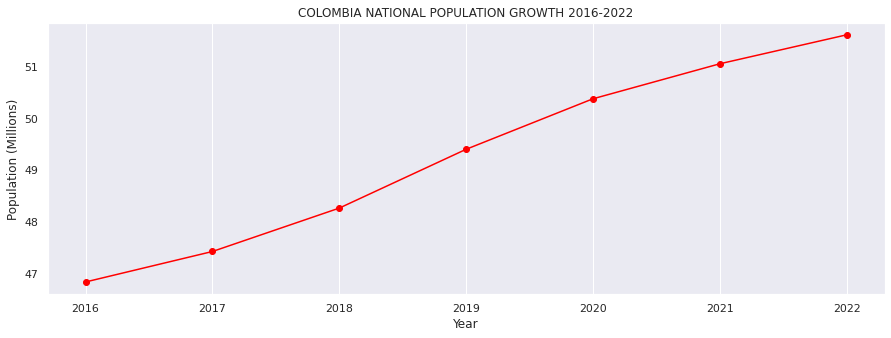

In [ ]:
lineplot=(year['Total']/1000000).plot(figsize=[15,5], color="red", title="COLOMBIA NATIONAL POPULATION GROWTH 2016-2022", marker='o')
lineplot.set_ylabel("Population (Millions)")
lineplot.set_xlabel("Year")
lineplot.grid(axis='y');

In [ ]:
departamento=pmun.groupby(['DP', 'AÑO']).sum()
departamento=departamento.drop(columns=['COD_MUNICIPIO'])
departamento

Total
DP AÑO          
5  2016  6211312
   2017  6296843
   2018  6407102
   2019  6550206
   2020  6677930
...          ...
99 2018   107808
   2019   110599
   2020   112958
   2021   114557
   2022   115778

[231 rows x 1 columns]

In [ ]:
departamento=departamento.reset_index()
departamento

,DP,AÑO,Total
0,5,2016,6211312
1,5,2017,6296843
2,5,2018,6407102
3,5,2019,6550206
4,5,2020,6677930
...,...,...,...
226,99,2018,107808
227,99,2019,110599
228,99,2020,112958
229,99,2021,114557


# Población por Departamento y sexo 2016-2022

In [ ]:
pdepartamento = pd.read_csv('data/UTF8_POBLACION_POR_DEPARTAMENTO_ SEXO_Y_EDAD_2016_2022.csv', delimiter=';')
pdepartamento.shape

(231, 311)

In [ ]:
pdepartamento.head()

,DP,DPNOM,AÑO,ÁREA GEOGRÁFICA,Hombres_0,Hombres_1,Hombres_2,Hombres_3,Hombres_4,Hombres_5,...,Total_95,Total_96,Total_97,Total_98,Total_99,Total_100 y más,Total Hombres,Total Mujeres,Total,Unnamed: 310
0,5,Antioquia,2016,Total,44860,45056,45267,45508,45787,46109,...,1715,1511,1607,911,784,2162,3000534,3210778,6211312,NaN
1,8,Atlántico,2016,Total,20771,20937,21038,21135,21224,21304,...,705,645,672,388,326,900,1182828,1244218,2427046,NaN
2,11,"Bogotá, D.C.",2016,Total,49334,49144,49013,48967,48988,49098,...,1776,1494,1316,984,833,2347,3495609,3805309,7300918,NaN
3,13,Bolívar,2016,Total,19436,19391,19356,19333,19324,19325,...,651,622,624,436,389,1135,1000545,1012465,2013010,NaN
4,15,Boyacá,2016,Total,9401,9451,9517,9599,9675,9744,...,526,561,378,158,122,328,590818,609160,1199978,NaN


In [ ]:
pdepartamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Columns: 311 entries, DP to Unnamed: 310
dtypes: float64(1), int64(308), object(2)
memory usage: 561.4+ KB


In [ ]:
pdep=pdepartamento[['DP', 'DPNOM', 'AÑO', 'Total Hombres', 'Total Mujeres', 'Total']]
#pdep=pdep.sort_values("Total", ascending=False)
pdep

,DP,DPNOM,AÑO,Total Hombres,Total Mujeres,Total
0,5,Antioquia,2016,3000534,3210778,6211312
1,8,Atlántico,2016,1182828,1244218,2427046
2,11,"Bogotá, D.C.",2016,3495609,3805309,7300918
3,13,Bolívar,2016,1000545,1012465,2013010
4,15,Boyacá,2016,590818,609160,1199978
...,...,...,...,...,...,...
226,91,Amazonas,2022,42406,39662,82068
227,94,Guainía,2022,26940,25121,52061
228,95,Guaviare,2022,47393,42964,90357
229,97,Vaupés,2022,25520,23412,48932


In [ ]:
pdep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DP             231 non-null    int64 
 1   DPNOM          231 non-null    object
 2   AÑO            231 non-null    int64 
 3   Total Hombres  231 non-null    int64 
 4   Total Mujeres  231 non-null    int64 
 5   Total          231 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 11.0+ KB


In [ ]:
pdep.isna().sum()

DP               0
DPNOM            0
AÑO              0
Total Hombres    0
Total Mujeres    0
Total            0
dtype: int64

In [ ]:
pmun['DP'].nunique()

33

In [ ]:
cuenta_depto=pdep.groupby(['AÑO']).count()
cuenta_depto

,DP,DPNOM,Total Hombres,Total Mujeres,Total
AÑO,,,,,
2016,33,33,33,33,33
2017,33,33,33,33,33
2018,33,33,33,33,33
2019,33,33,33,33,33
2020,33,33,33,33,33
2021,33,33,33,33,33
2022,33,33,33,33,33


In [ ]:
depaño=pdep.groupby(['AÑO']).sum()
depaño=depaño.drop(columns=['DP'])
depaño

,Total Hombres,Total Mujeres,Total
AÑO,,,
2016,22918130,23911986,46830116
2017,23196961,24222239,47419200
2018,23573287,24685207,48258494
2019,24123683,25271995,49395678
2020,24594882,25777542,50372424
2021,24912231,26137267,51049498
2022,25167261,26442213,51609474


In [ ]:
est_hombres=pdep.groupby(['AÑO'])
est_hombres['Total Hombres'].describe()

,count,mean,std,min,25%,50%,75%,max
AÑO,,,,,,,,
2016,33.0,694488.787879,799701.819846,20439.0,203376.0,509304.0,793253.0,3495609.0
2017,33.0,702938.212121,806935.303628,20961.0,203702.0,517539.0,795770.0,3511579.0
2018,33.0,714342.030303,817814.467665,21425.0,203804.0,525903.0,798195.0,3544078.0
2019,33.0,731020.696970,837525.199753,22395.0,205507.0,531199.0,796796.0,3633389.0
2020,33.0,745299.454545,854664.999074,23398.0,207288.0,535995.0,798772.0,3707838.0
2021,33.0,754916.090909,866482.130915,24453.0,209070.0,539642.0,809856.0,3751549.0
2022,33.0,762644.272727,876560.790655,25520.0,210944.0,543002.0,814186.0,3783875.0


In [ ]:
est_mujeres=pdep.groupby(['AÑO'])
est_mujeres['Total Mujeres'].describe()

,count,mean,std,min,25%,50%,75%,max
AÑO,,,,,,,,
2016,33.0,724605.636364,866174.737796,18298.0,196607.0,508212.0,822514.0,3805309.0
2017,33.0,734007.242424,874362.043622,18850.0,197397.0,510643.0,826214.0,3825870.0
2018,33.0,748036.575758,887936.699094,19372.0,198045.0,514517.0,832397.0,3868488.0
2019,33.0,765818.030303,908037.979084,20326.0,200635.0,520926.0,832185.0,3959482.0
2020,33.0,781137.636364,925645.506827,21314.0,203233.0,527459.0,832046.0,4036117.0
2021,33.0,792038.393939,938612.441510,22355.0,205771.0,532770.0,833013.0,4082618.0
2022,33.0,801279.181818,950373.261613,23412.0,208331.0,537704.0,837092.0,4117778.0


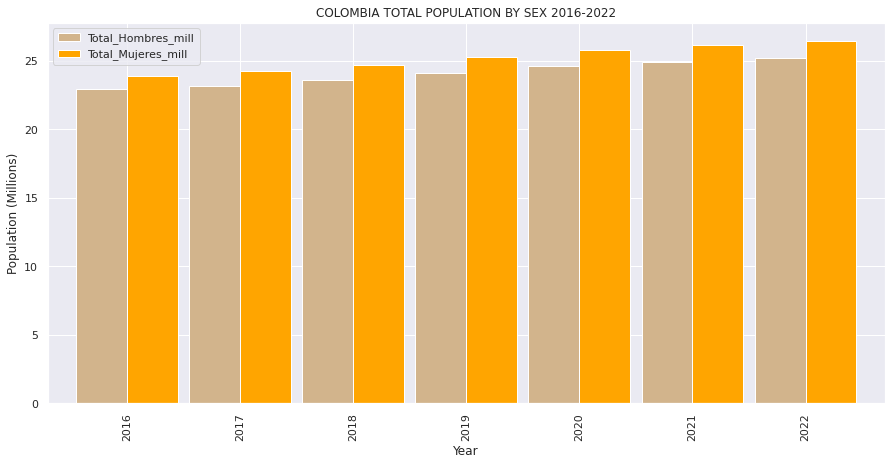

In [ ]:
depaño['Total_Hombres_mill']=depaño['Total Hombres']/1000000
depaño['Total_Mujeres_mill']=depaño['Total Mujeres']/1000000

bar_graph=depaño[["Total_Hombres_mill", "Total_Mujeres_mill"]].plot.bar(figsize=[15,7], title="COLOMBIA TOTAL POPULATION BY SEX 2016-2022", width=0.9, color=['tan', 'orange'])
bar_graph.set_xlabel("Year")
bar_graph.set_ylabel("Population (Millions)");

In [ ]:
import plotly.express as px

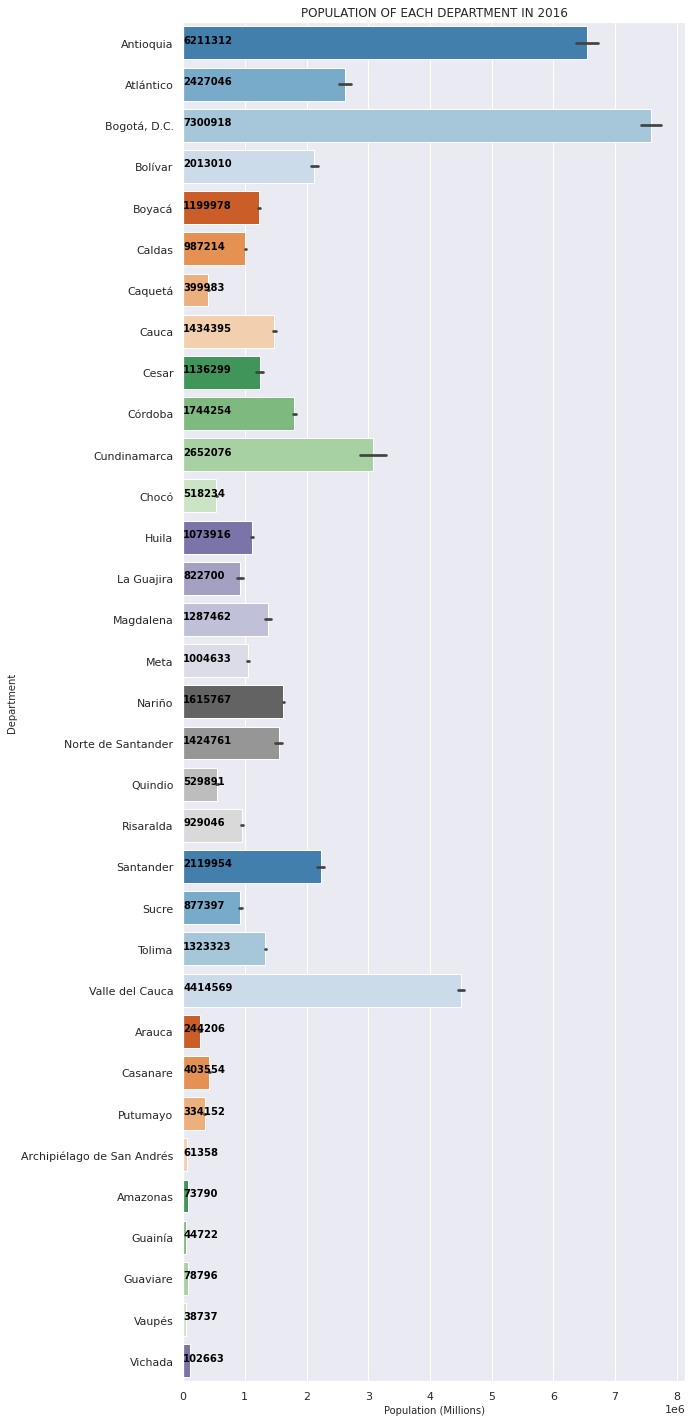

In [ ]:
plt.figure(figsize=(9,25))
ax = sns.barplot(x=pdep['Total'], y=pdep['DPNOM'],
                 data=pdep[pdep['AÑO']==2016], palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(pdep['Total'][pdep['AÑO']==2016]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("POPULATION OF EACH DEPARTMENT IN 2016")
ax.set_xlabel(xlabel = 'Population (Millions)', fontsize = 10)
ax.set_ylabel(ylabel = 'Department', fontsize = 10)
plt.show()

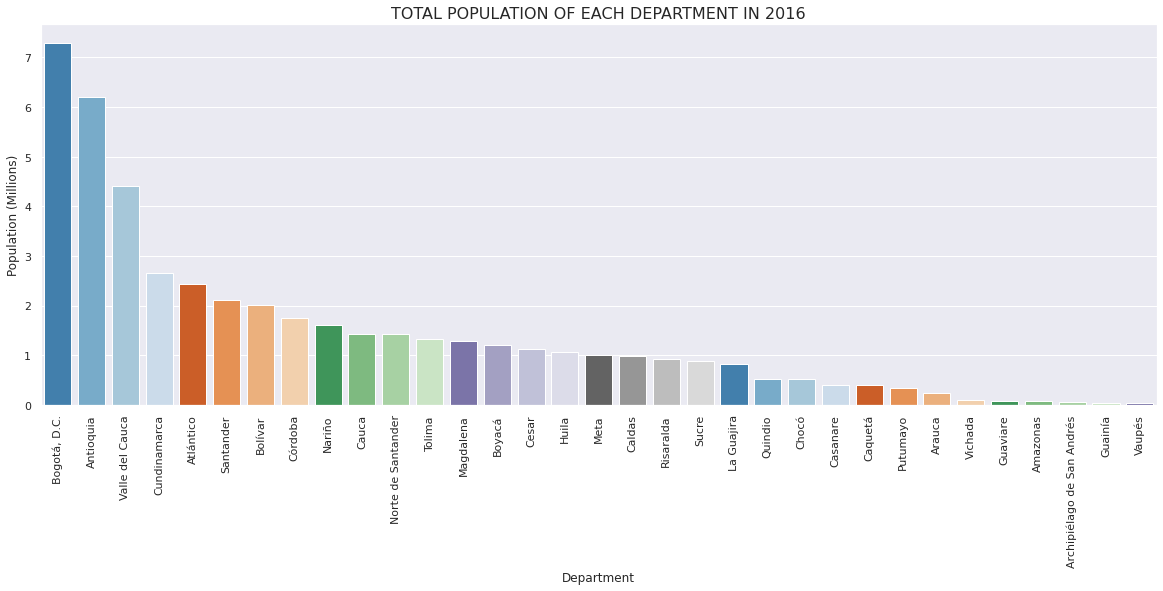

In [ ]:
# 2016 population data
depbar = pdep[pdep['AÑO'] == 2016][:33]
depbar['POBLACION']=depbar['Total']/1000000
depbar=depbar.sort_values('POBLACION', ascending=False)
plt.rcParams['figure.figsize'] = (20, 7)
ax = sns.barplot(x = depbar['DPNOM'][:33], y = depbar['POBLACION'][:33], palette = 'tab20c')
ax.set_xlabel(xlabel = 'Department', fontsize = 12)
ax.set_ylabel(ylabel = 'Population (Millions)', fontsize = 12)
ax.set_title(label = 'TOTAL POPULATION OF EACH DEPARTMENT IN 2016', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

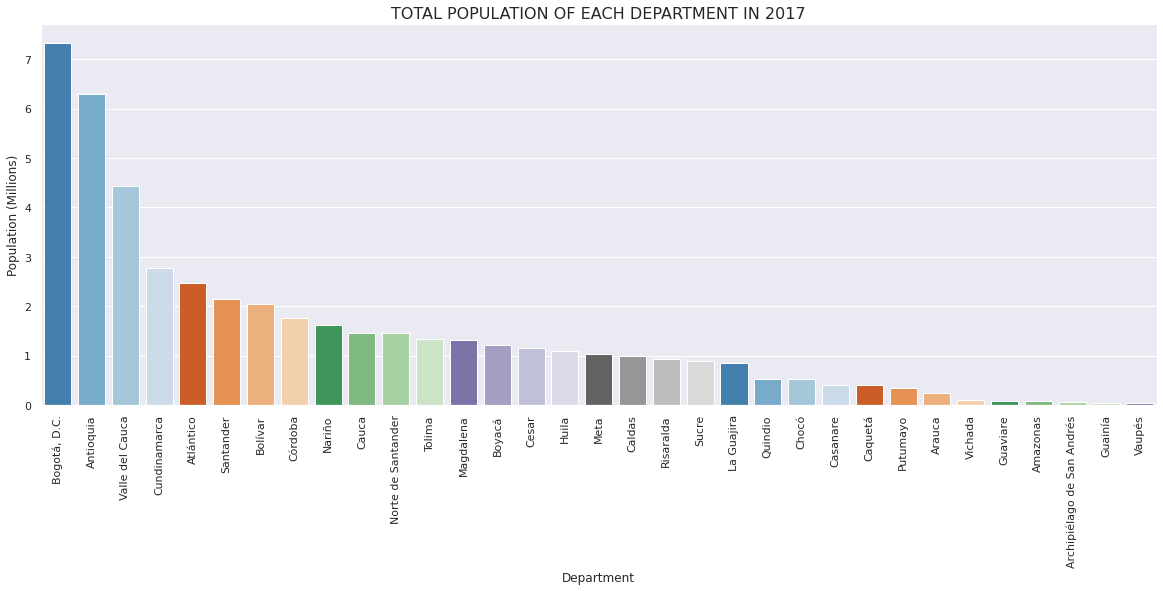

In [ ]:
# 2017 population data
depbar = pdep[pdep['AÑO'] == 2017][:33]
depbar['POBLACION']=depbar['Total']/1000000
depbar=depbar.sort_values('POBLACION', ascending=False)
plt.rcParams['figure.figsize'] = (20, 7)
ax = sns.barplot(x = depbar['DPNOM'][:33], y = depbar['POBLACION'][:33], palette = 'tab20c')
ax.set_xlabel(xlabel = 'Department', fontsize = 12)
ax.set_ylabel(ylabel = 'Population (Millions)', fontsize = 12)
ax.set_title(label = 'TOTAL POPULATION OF EACH DEPARTMENT IN 2017', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

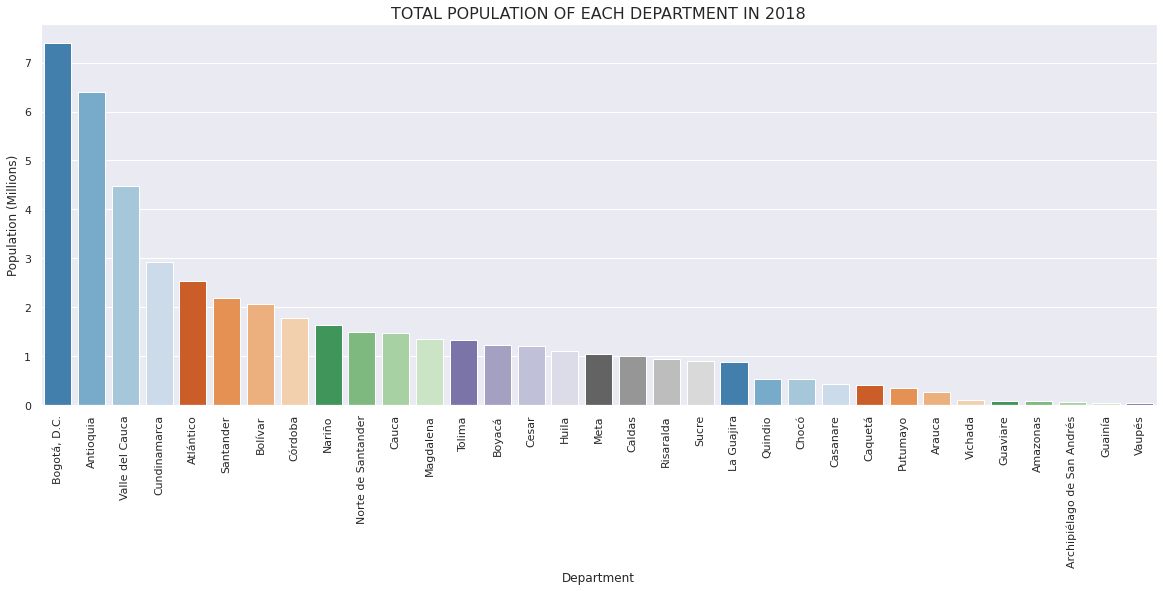

In [ ]:
# 2018 population data
depbar = pdep[pdep['AÑO'] == 2018][:33]
depbar['POBLACION']=depbar['Total']/1000000
depbar=depbar.sort_values('POBLACION', ascending=False)
plt.rcParams['figure.figsize'] = (20, 7)
ax = sns.barplot(x = depbar['DPNOM'][:33], y = depbar['POBLACION'][:33], palette = 'tab20c')
ax.set_xlabel(xlabel = 'Department', fontsize = 12)
ax.set_ylabel(ylabel = 'Population (Millions)', fontsize = 12)
ax.set_title(label = 'TOTAL POPULATION OF EACH DEPARTMENT IN 2018', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

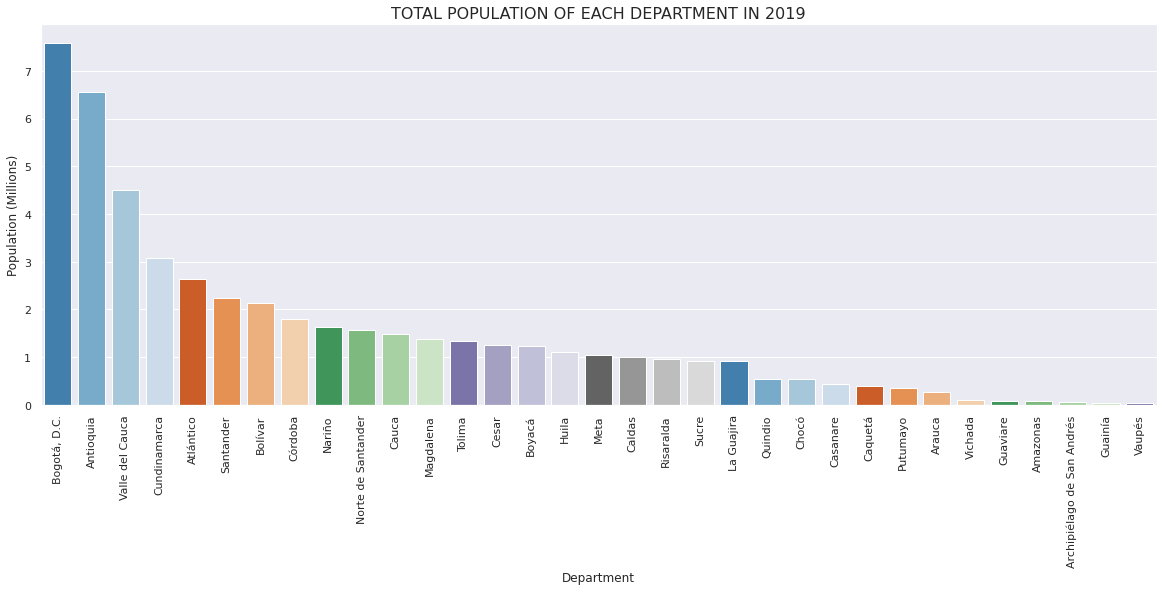

In [ ]:
# 2019 population data
depbar = pdep[pdep['AÑO'] == 2019][:33]
depbar['POBLACION']=depbar['Total']/1000000
depbar=depbar.sort_values('POBLACION', ascending=False)
plt.rcParams['figure.figsize'] = (20, 7)
ax = sns.barplot(x = depbar['DPNOM'][:33], y = depbar['POBLACION'][:33], palette = 'tab20c')
ax.set_xlabel(xlabel = 'Department', fontsize = 12)
ax.set_ylabel(ylabel = 'Population (Millions)', fontsize = 12)
ax.set_title(label = 'TOTAL POPULATION OF EACH DEPARTMENT IN 2019', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

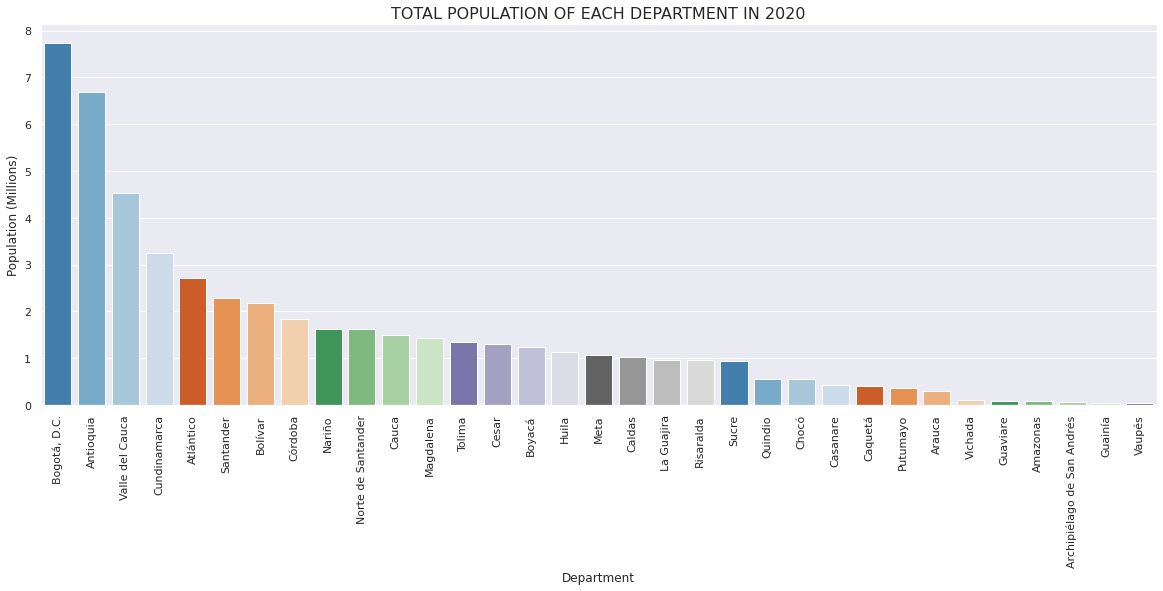

In [ ]:
# 2020 population data
depbar = pdep[pdep['AÑO'] == 2020][:33]
depbar['POBLACION']=depbar['Total']/1000000
depbar=depbar.sort_values('POBLACION', ascending=False)
plt.rcParams['figure.figsize'] = (20, 7)
ax = sns.barplot(x = depbar['DPNOM'][:33], y = depbar['POBLACION'][:33], palette = 'tab20c')
ax.set_xlabel(xlabel = 'Department', fontsize = 12)
ax.set_ylabel(ylabel = 'Population (Millions)', fontsize = 12)
ax.set_title(label = 'TOTAL POPULATION OF EACH DEPARTMENT IN 2020', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

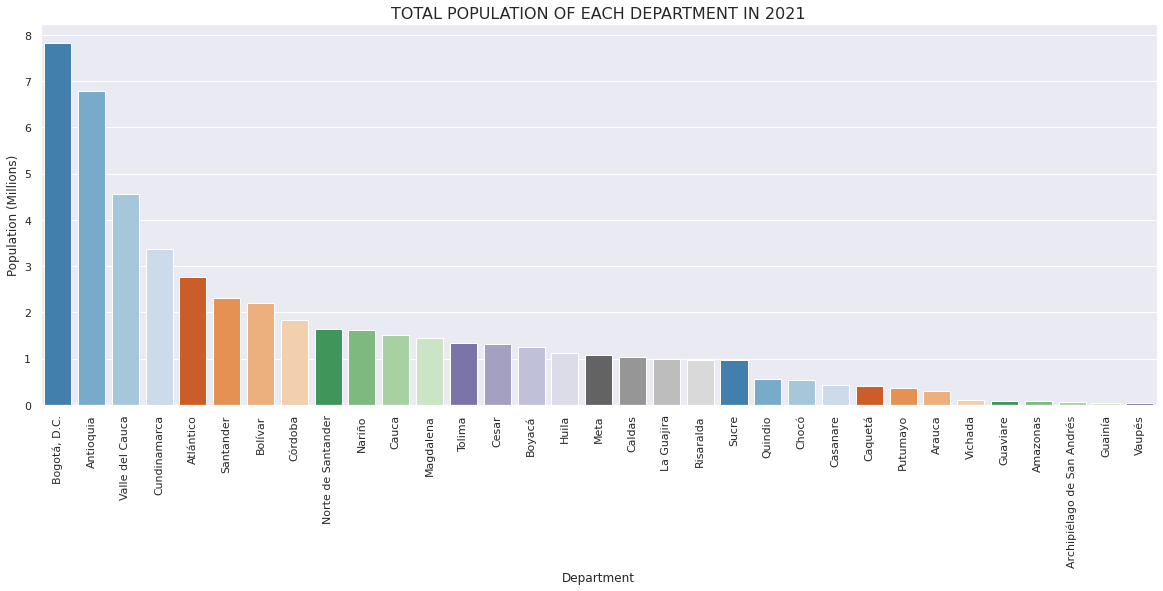

In [ ]:
# 2021 population data
depbar = pdep[pdep['AÑO'] == 2021][:33]
depbar['POBLACION']=depbar['Total']/1000000
depbar=depbar.sort_values('POBLACION', ascending=False)
plt.rcParams['figure.figsize'] = (20, 7)
ax = sns.barplot(x = depbar['DPNOM'][:33], y = depbar['POBLACION'][:33], palette = 'tab20c')
ax.set_xlabel(xlabel = 'Department', fontsize = 12)
ax.set_ylabel(ylabel = 'Population (Millions)', fontsize = 12)
ax.set_title(label = 'TOTAL POPULATION OF EACH DEPARTMENT IN 2021', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

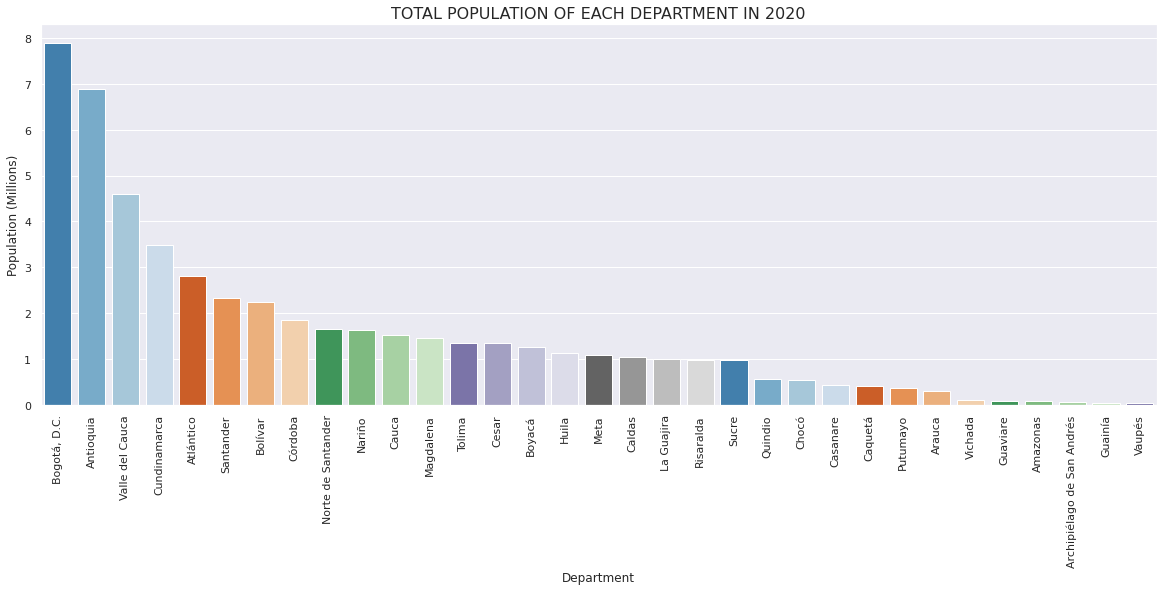

In [ ]:
# 2022 population data
depbar = pdep[pdep['AÑO'] == 2022][:33]
depbar['POBLACION']=depbar['Total']/1000000
depbar=depbar.sort_values('POBLACION', ascending=False)
plt.rcParams['figure.figsize'] = (20, 7)
ax = sns.barplot(x = depbar['DPNOM'][:33], y = depbar['POBLACION'][:33], palette = 'tab20c')
ax.set_xlabel(xlabel = 'Department', fontsize = 12)
ax.set_ylabel(ylabel = 'Population (Millions)', fontsize = 12)
ax.set_title(label = 'TOTAL POPULATION OF EACH DEPARTMENT IN 2020', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70a6331b-3e37-4c4d-8041-2d29d0ba96c1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>